In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torch

In [65]:
df = pd.read_csv("/Users/mihiragarwal/Desktop/Project Courses/NILM_Uncertainty/datasets/Building1_NILM_data_basic.csv")

In [66]:
df.head()

,Timestamp,main,Refrigerator,Dish Washer,Microwave,Washer Dryer
0,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-04-18 09:22:00-04:00,342.50726,6.0000,0.142857,5.00,0.000
2,2011-04-18 09:23:00-04:00,345.53015,6.0000,0.285714,5.00,0.000
3,2011-04-18 09:24:00-04:00,345.14550,6.0000,0.437500,5.00,0.000
4,2011-04-18 09:25:00-04:00,342.37317,5.9375,0.187500,4.75,0.125


In [67]:
y = df['main'][1:]

In [68]:
x = df["Refrigerator"][1:]

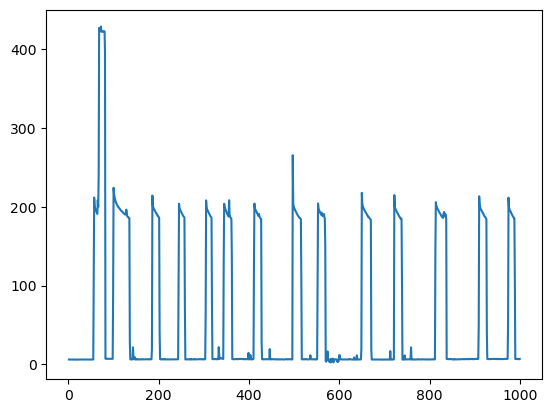

In [69]:
plt.plot(x[:1000])


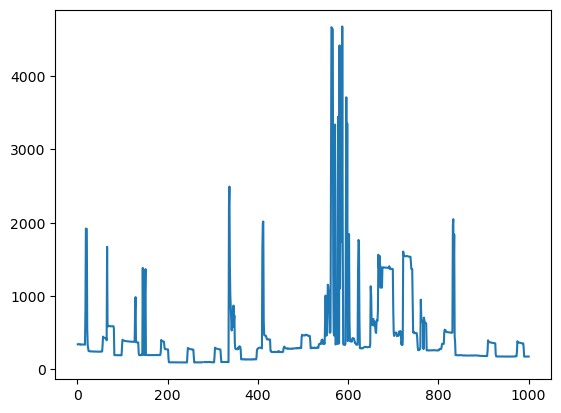

In [70]:
plt.plot(y[:1000])

In [71]:
def preprocess_data(data, window_length):
    """
    Returns sequences and target points from the given time series data.
    
    data: (N,) array containing the time series data.
    window_length: The length of the sequences to extract.
    """
    x,y = data
    half_window = window_length // 2
    sequences = []
    targets = []
    
    for i in range(half_window, len(x) - half_window):
        sequence = x[i - half_window : i + half_window]
        target = y[i]
        sequences.append(sequence)
        targets.append(target)

    return torch.tensor(np.array(sequences)), torch.tensor(np.array(targets))


In [72]:
window_length = 10

In [73]:
x,y = preprocess_data((x,y), window_length)

In [75]:
class Seq2PointCNN(nn.Module):
    def __init__(self):
        super(Seq2PointCNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, 5, padding=2)
        self.conv2 = nn.Conv1d(16, 8, 3, padding=1)
        self.fc = nn.Linear(8 * window_length, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.unsqueeze(1) # Add channel dimension
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        return self.fc(x)


In [ ]:
model = Seq2PointCNN()
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()
epochs = 100

In [52]:
model

Seq2PointCNN(
  (conv1): Conv1d(1, 16, kernel_size=(5,), stride=(1,), padding=(2,))
  (conv2): Conv1d(16, 8, kernel_size=(3,), stride=(1,), padding=(1,))
  (fc): Linear(in_features=80, out_features=1, bias=True)
  (relu): ReLU()
)

In [51]:

for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        loss.backward()
        optimizer.step()


AttributeError: 'Series' object has no attribute 'unsqueeze'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torch
import pdb

lin = torch.linspace(0, 100, 1000)
x = torch.sin(lin) +  torch.sin(2 * lin) + torch.sin(3 * lin)
y_sin1 = torch.sin(lin)
y_sin2 = torch.sin(2 * lin)
y_sin3 = torch.sin(3 * lin)

# Stack the tensors horizontally to form a matrix
y = torch.stack((y_sin1, y_sin2, y_sin3), dim=1)

x, y = x.numpy(), y.numpy()


def preprocess_data(data, window_length):
    """
    Returns sequences and target points from the given time series data.
    
    data: (N,) array containing the time series data.
    window_length: The length of the sequences to extract.
    """
    x, y = data
    half_window = window_length // 2
    sequences = []
    targets = []
    
    for i in range(half_window, len(x) - half_window):
        sequence = x[i - half_window : i + half_window]
        target = y[i]
        sequences.append(sequence)
        targets.append(target)

    return torch.tensor(np.array(sequences), dtype=torch.float32), torch.tensor(np.array(targets), dtype=torch.float32)

window_length = 10
x, y = preprocess_data((x, y), window_length)


class Seq2PointCNN(nn.Module):
    def __init__(self):
        super(Seq2PointCNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, 5, padding=2)
        self.conv2 = nn.Conv1d(16, 8, 3, padding=1)
        self.fc = nn.Linear(8 * window_length, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.unsqueeze(1) # Add channel dimension
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        return self.fc(x)
    
model = Seq2PointCNN()
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()
epochs = 100
x,y = torch.tensor(x), torch.tensor(y)
y_pred = model(x)






/var/folders/jk/w0z8m7r15qz2bq604dfvr16h0000gn/T/ipykernel_18112/3905169612.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x,y = torch.tensor(x), torch.tensor(y)


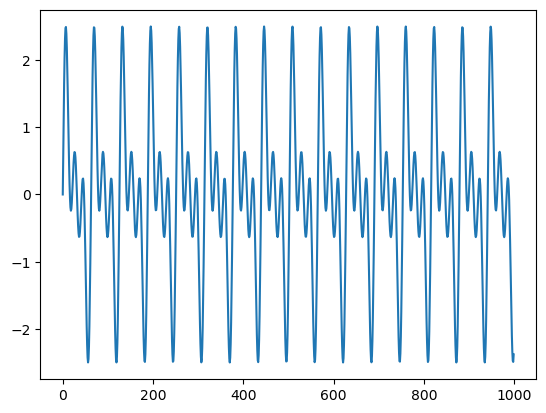

In [21]:
plt.plot( torch.sin(lin) +  torch.sin(2 * lin) + torch.sin(3 * lin))

In [14]:
for epoch in range(epochs*2):
        
        optimizer.zero_grad()
        y_pred = model(x)
        loss = loss_fn(y, y_pred.squeeze())
        print(loss, "\r")
        loss.backward()
        optimizer.step()

tensor(0.0560, grad_fn=<MseLossBackward0>) 
tensor(0.0560, grad_fn=<MseLossBackward0>) 
tensor(0.0559, grad_fn=<MseLossBackward0>) 
tensor(0.0559, grad_fn=<MseLossBackward0>) 
tensor(0.0558, grad_fn=<MseLossBackward0>) 
tensor(0.0557, grad_fn=<MseLossBackward0>) 
tensor(0.0557, grad_fn=<MseLossBackward0>) 
tensor(0.0556, grad_fn=<MseLossBackward0>) 
tensor(0.0555, grad_fn=<MseLossBackward0>) 
tensor(0.0555, grad_fn=<MseLossBackward0>) 
tensor(0.0554, grad_fn=<MseLossBackward0>) 
tensor(0.0554, grad_fn=<MseLossBackward0>) 
tensor(0.0553, grad_fn=<MseLossBackward0>) 
tensor(0.0552, grad_fn=<MseLossBackward0>) 
tensor(0.0552, grad_fn=<MseLossBackward0>) 
tensor(0.0551, grad_fn=<MseLossBackward0>) 
tensor(0.0551, grad_fn=<MseLossBackward0>) 
tensor(0.0550, grad_fn=<MseLossBackward0>) 
tensor(0.0549, grad_fn=<MseLossBackward0>) 
tensor(0.0549, grad_fn=<MseLossBackward0>) 
tensor(0.0548, grad_fn=<MseLossBackward0>) 
tensor(0.0548, grad_fn=<MseLossBackward0>) 
tensor(0.0547, grad_fn=<MseLossB

In [15]:
y_pred = model(x)

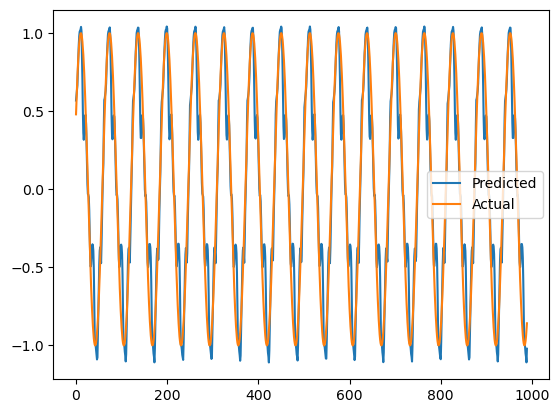

In [17]:
plt.plot(y_pred.detach().numpy()[:, 0])
# plt.plot(y_pred.detach().numpy()[:, 1])
# plt.plot(y_pred.detach().numpy()[:, 2])

plt.plot(y.detach().numpy()[:, 0])
plt.legend(["Predicted", "Actual"])
# plt.plot(y.detach().numpy()[:, 1])  
# plt.plot(y.detach().numpy()[:, 2])
plt.show()